# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.0f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df_data.isna().any()

Unnamed: 0        False
Unnamed: 0.1      False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [9]:
df_data.duplicated().value_counts()

False    4324
dtype: int64

In [10]:
df_data = df_data.drop("Unnamed: 0", axis=1)

In [11]:
df_data[df_data["Price"].isna()]

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [12]:
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [13]:
df_organisation = df_data.groupby("Organisation")
df_organisation_sorted = df_organisation.count().sort_values(by="Rocket_Status", ascending=False)
df_organisation_sorted

,Unnamed: 0.1,Location,Date,Detail,Rocket_Status,Price,Mission_Status
Organisation,,,,,,,
RVSN USSR,1777,1777,1777,1777,1777,2,1777
Arianespace,279,279,279,279,279,96,279
General Dynamics,251,251,251,251,251,0,251
CASC,251,251,251,251,251,158,251
NASA,203,203,203,203,203,149,203
VKS RF,201,201,201,201,201,33,201
US Air Force,161,161,161,161,161,26,161
ULA,140,140,140,140,140,98,140
Boeing,136,136,136,136,136,7,136


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
df_status = df_data.Rocket_Status.value_counts()
df_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [15]:
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


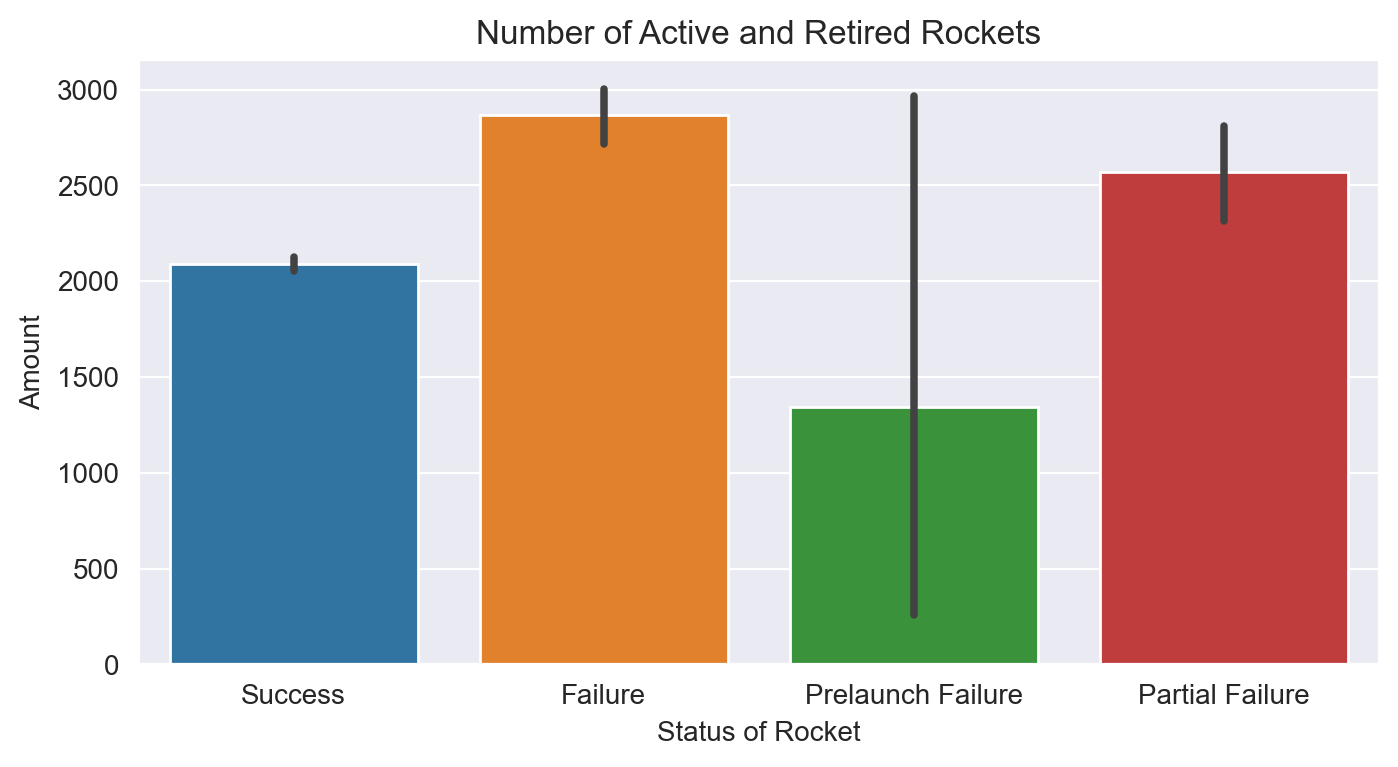

In [16]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(data=df_data,
                     y=df_data.index,
                     x="Mission_Status"
                     )
    
    ax.set(xlabel="Status of Rocket",
           ylabel="Amount",
           title="Number of Active and Retired Rockets"
           )
    
    plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [17]:
df_mission_status = df_data.groupby("Mission_Status").count().sort_values("Rocket_Status", ascending=False)
df_mission_status

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price
Mission_Status,,,,,,,
Success,3879,3879,3879,3879,3879,3879,910
Failure,339,339,339,339,339,339,36
Partial Failure,102,102,102,102,102,102,17
Prelaunch Failure,4,4,4,4,4,4,1


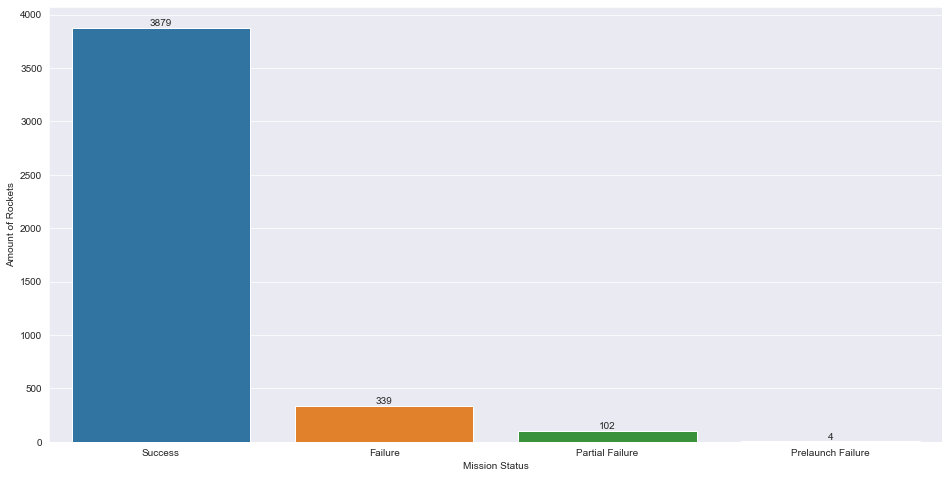

In [18]:
plt.figure(figsize=(16,8))

with sns.axes_style("darkgrid"):
    ax = sns.barplot(data=df_mission_status,
                x=df_mission_status.index,
                y="Rocket_Status")

    ax.set(xlabel="Mission Status",
           ylabel="Amount of Rockets"
    )
    
    ax.bar_label(ax.containers[0])   

    sns.set(font_scale=1)

    plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [19]:
df_prices = df_data.dropna()

In [20]:
df_prices.isna().any()

Unnamed: 0.1      False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price             False
Mission_Status    False
dtype: bool

In [21]:
df_prices.sort_values("Price")

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3683,3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure
3149,3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.0",Success
3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.0",Success
3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success
3384,3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.0",Success
...,...,...,...,...,...,...,...,...
510,510,MHI,"LA-Y1, Tanegashima Space Center, Japan","Thu Mar 26, 2015 01:21 UTC",H-IIA 202 | IGS-Optical 5,StatusActive,90.0,Success
365,365,MHI,"LA-Y1, Tanegashima Space Center, Japan","Fri Mar 17, 2017 01:20 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,90.0,Success
146,146,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 11, 2019 22:35 UTC",Falcon Heavy | ArabSat 6A,StatusActive,90.0,Success
236,236,MHI,"LA-Y1, Tanegashima Space Center, Japan","Tue Jun 12, 2018 04:20 UTC",H-IIA 202 | IGS Radar-6,StatusActive,90.0,Success


In [22]:
df_prices.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [23]:
df_prices.Price = df_prices.Price.astype(str).str.replace(",", "")
df_prices

c:\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...
3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [24]:
df_prices.Price = pd.to_numeric(df_prices.Price)

c:\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
df_prices.dtypes

Unnamed: 0.1        int64
Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
dtype: object

In [26]:
x_ticks = np.linspace(start=df_prices["Price"].min(), stop=df_prices["Price"].max(), num=25)
x_ticks

array([   5.3   ,  213.4125,  421.525 ,  629.6375,  837.75  , 1045.8625,
       1253.975 , 1462.0875, 1670.2   , 1878.3125, 2086.425 , 2294.5375,
       2502.65  , 2710.7625, 2918.875 , 3126.9875, 3335.1   , 3543.2125,
       3751.325 , 3959.4375, 4167.55  , 4375.6625, 4583.775 , 4791.8875,
       5000.    ])

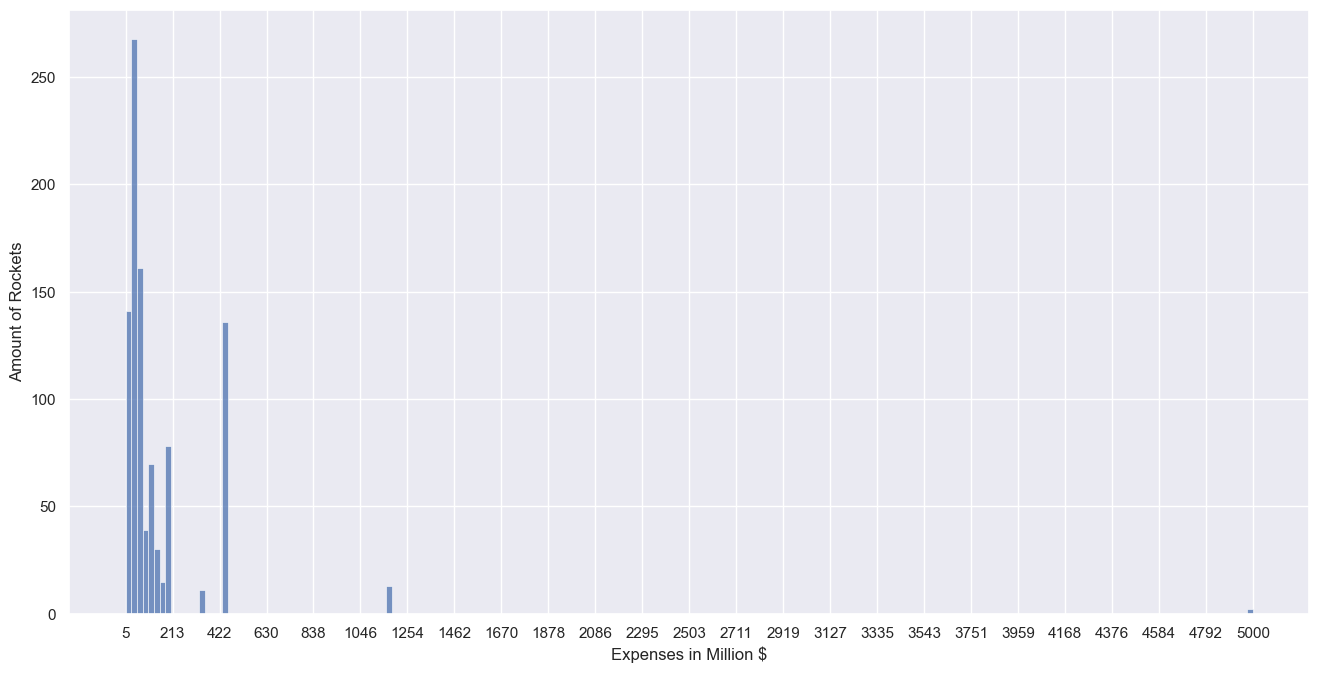

In [27]:
plt.figure(figsize=(16,8), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.histplot(data=df_prices,
                      x="Price")
    
    ax.set(xlabel="Expenses in Million $",
           ylabel="Amount of Rockets")

    
    plt.xticks(x_ticks)
    
    plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [28]:
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [29]:
df_data["Country"] = [x.split(",")[-1] for x in df_data.Location]
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [30]:
import plotly.express  as px

In [31]:
country = df_data.Country.value_counts()
 
world_map = px.choropleth(country, locations=country.index, locationmode='country names', color=country.values, color_continuous_scale=px.colors.sequential.matter)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [32]:
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [33]:
df_failures = df_data.groupby("Country").count()
df_failures

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
Country,,,,,,,,
Australia,6,6,6,6,6,6,0,6
Barents Sea,3,3,3,3,3,3,0,3
Brazil,3,3,3,3,3,3,0,3
China,268,268,268,268,268,268,158,268
France,303,303,303,303,303,303,95,303
Gran Canaria,2,2,2,2,2,2,2,2
India,76,76,76,76,76,76,67,76
Iran,13,13,13,13,13,13,0,13
Israel,11,11,11,11,11,11,0,11


In [34]:
world_map = px.choropleth(df_failures, 
                          locations=df_failures.index, 
                          locationmode='country names', 
                          color=df_failures.Mission_Status, 
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Failures in Countries")
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [35]:
df_sunburst = df_data.groupby(["Country", "Organisation", "Mission_Status"], as_index =False).count()
df_sunburst

,Country,Organisation,Mission_Status,Unnamed: 0.1,Location,Date,Detail,Rocket_Status,Price
0,Australia,AMBA,Success,1,1,1,1,1,0
1,Australia,CECLES,Failure,2,2,2,2,2,0
2,Australia,CECLES,Success,1,1,1,1,1,0
3,Australia,RAE,Failure,1,1,1,1,1,0
4,Australia,RAE,Success,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
129,USA,US Navy,Failure,14,14,14,14,14,0
130,USA,US Navy,Partial Failure,1,1,1,1,1,0
131,USA,US Navy,Success,2,2,2,2,2,0
132,USA,Virgin Orbit,Failure,1,1,1,1,1,1


In [36]:
fig = px.sunburst(
    data_frame=df_data,
    path=["Country","Organisation", "Mission_Status"]
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [37]:
df_data.dtypes

Unnamed: 0.1       int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
Country           object
dtype: object

In [38]:
df_prices_org = df_prices.groupby("Organisation", as_index =False).sum().sort_values("Price", ascending=False)

In [39]:
df_prices_org.head()

,Organisation,Unnamed: 0.1,Price
14,NASA,249811,"76,280"
0,Arianespace,53444,"16,345"
21,ULA,52693,"14,798"
16,RVSN USSR,3916,"10,000"
2,CASC,100428,"6,340"


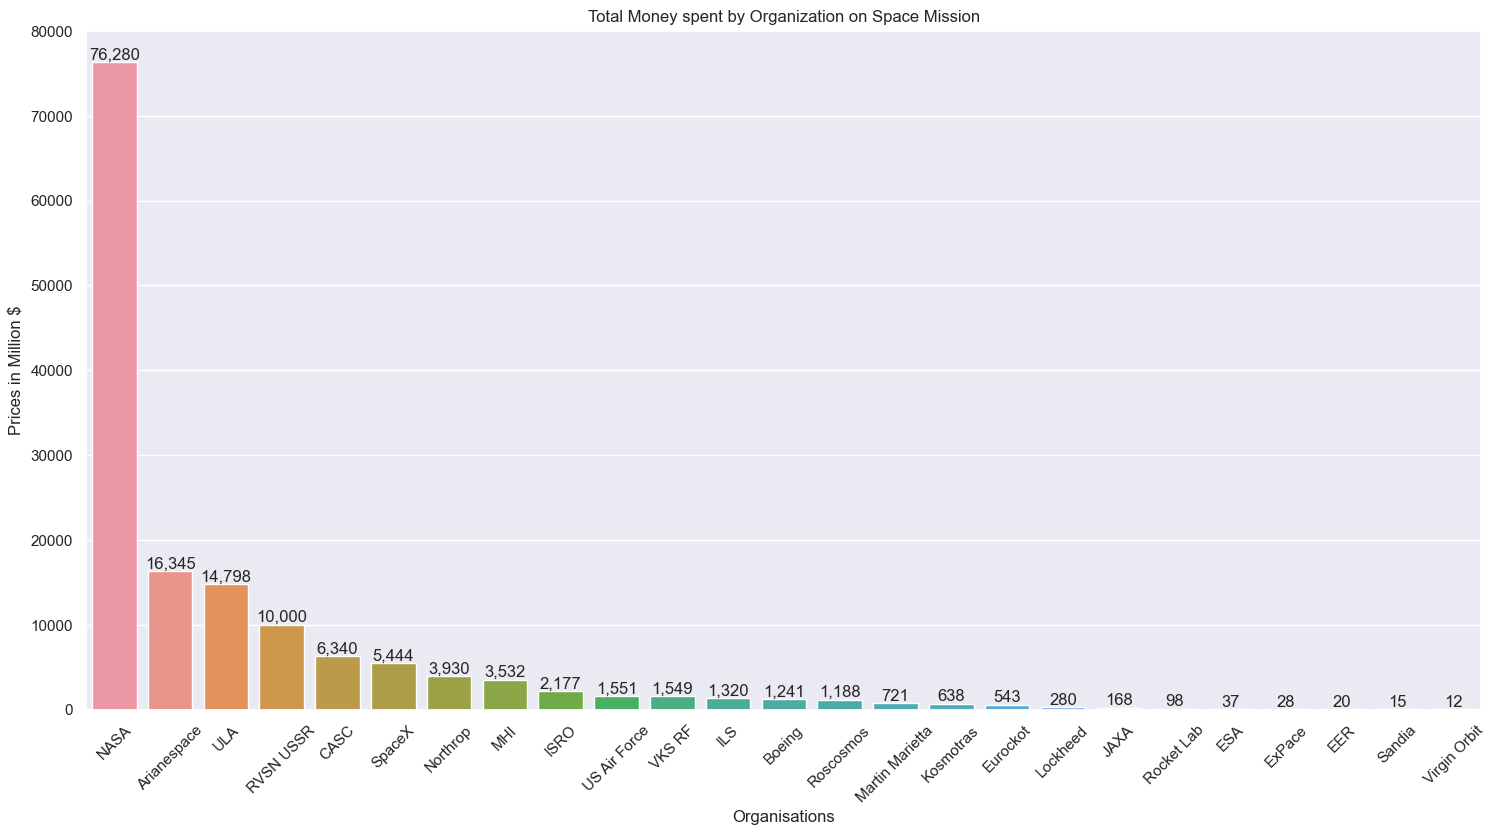

In [40]:
plt.figure(figsize=(18,9), dpi=100)
with sns.axes_style("darkgrid"):
   ax = sns.barplot(data=df_prices_org,
               x="Organisation",
               y="Price")
    
   ax.set(ylabel="Prices in Million $",
         xlabel="Organisations",
         title="Total Money spent by Organization on Space Mission")

   for c in ax.containers:
      ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues])
   

   sns.set(font_scale=1)
   plt.xticks(rotation=45)
   plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [41]:
df_prices.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,30,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,65,Success


In [42]:
prices_summed = df_prices.groupby("Organisation", as_index=False)["Price"].sum().sort_values("Price", ascending=False)

In [43]:
prices_counted = df_prices.groupby("Organisation", as_index=False)["Price"].count().sort_values("Price", ascending=False)
prices_summed["Per Launch"] = (prices_summed["Price"] / prices_counted["Price"]).round(0)
prices_summed.head()  

,Organisation,Price,Per Launch
14,NASA,"76,280",512
0,Arianespace,"16,345",170
21,ULA,"14,798",151
16,RVSN USSR,"10,000","5,000"
2,CASC,"6,340",40


In [44]:
df_prices.groupby("Organisation", as_index=False).sum().sort_values("Price", ascending=False)

,Organisation,Unnamed: 0.1,Price
14,NASA,249811,"76,280"
0,Arianespace,53444,"16,345"
21,ULA,52693,"14,798"
16,RVSN USSR,3916,"10,000"
2,CASC,100428,"6,340"
20,SpaceX,32510,"5,444"
15,Northrop,81471,"3,930"
12,MHI,19544,"3,532"
8,ISRO,42119,"2,177"
22,US Air Force,97290,"1,551"


In [45]:
prices_summed

,Organisation,Price,Per Launch
14,NASA,"76,280",512
0,Arianespace,"16,345",170
21,ULA,"14,798",151
16,RVSN USSR,"10,000","5,000"
2,CASC,"6,340",40
20,SpaceX,"5,444",55
15,Northrop,"3,930",47
12,MHI,"3,532",95
8,ISRO,"2,177",32
22,US Air Force,"1,551",60


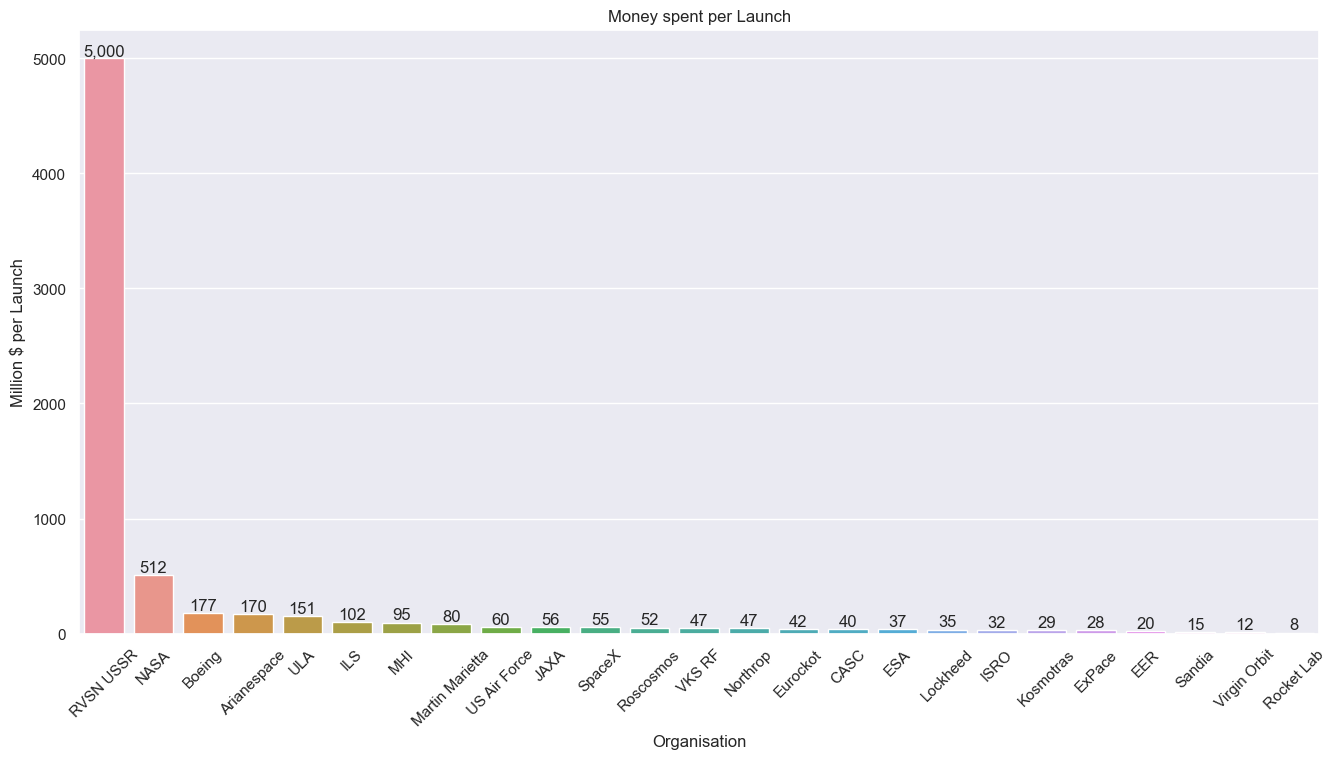

In [46]:
plt.figure(figsize=(16,8), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(data=prices_summed.sort_values("Per Launch", ascending=False),
                x="Organisation",
                y="Per Launch")
    
    plt.xticks(rotation=45)
    
    ax.set(xlabel="Organisation",
           ylabel="Million $ per Launch",
           title="Money spent per Launch")
    sns.set(font_scale=1)
    for c in ax.containers:
        ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues])
    
    plt.show()

# Chart the Number of Launches per Year

In [47]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

In [48]:
df_data["Date"].dtypes

datetime64[ns, UTC]

In [49]:
df_data['Year'] = pd.DatetimeIndex(df_data['Date']).year
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020


In [50]:
df_yearly = df_data.groupby("Year", as_index=False).count().sort_values("Year", ascending=True)
df_yearly

,Year,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,1957,3,3,3,3,3,3,0,3,3
1,1958,28,28,28,28,28,28,0,28,28
2,1959,20,20,20,20,20,20,0,20,20
3,1960,39,39,39,39,39,39,0,39,39
4,1961,52,52,52,52,52,52,0,52,52
...,...,...,...,...,...,...,...,...,...,...
59,2016,90,90,90,90,90,90,64,90,90
60,2017,92,92,92,92,92,92,66,92,92
61,2018,117,117,117,117,117,117,88,117,117
62,2019,109,109,109,109,109,109,73,109,109


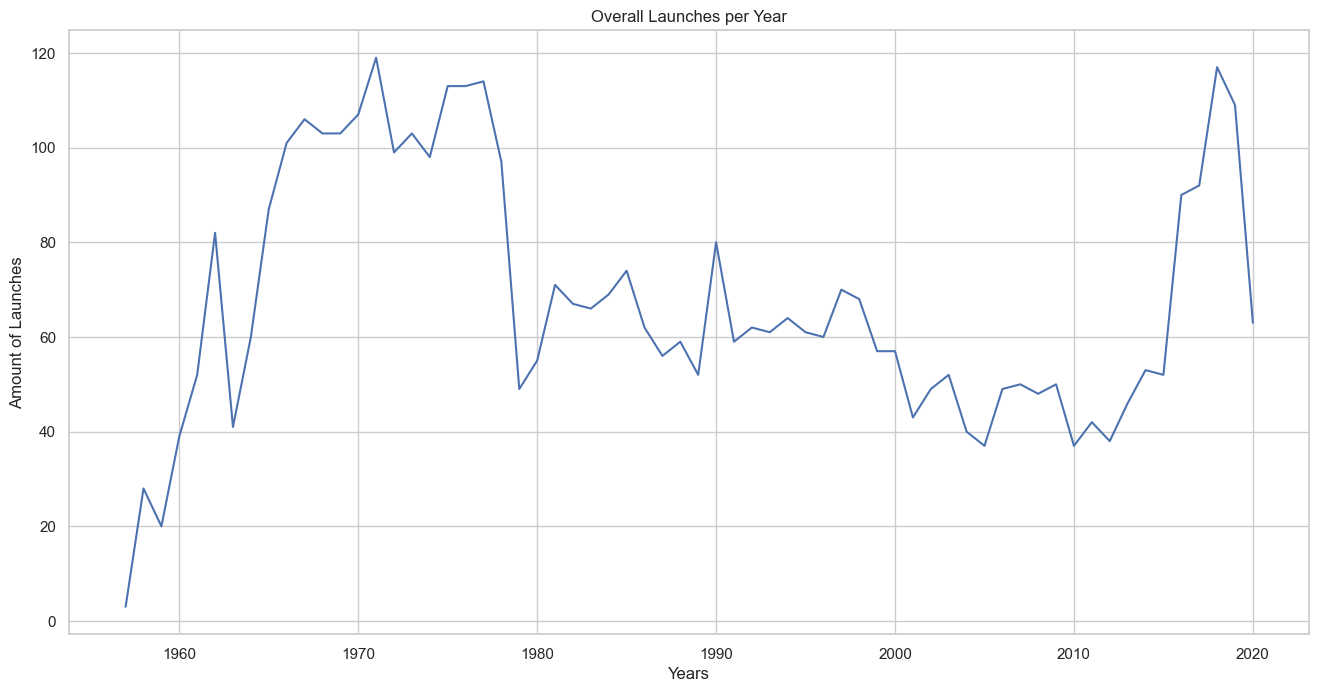

In [51]:
plt.figure(figsize=(16,8), dpi=100)

with sns.axes_style("whitegrid"):
    ax = sns.lineplot(data=df_yearly,
                 x="Year",
                 y="Organisation")
    
    ax.set(ylabel="Amount of Launches",
           xlabel="Years",
           title="Overall Launches per Year")
    
    sns.set(font_scale=1.25)

    plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [52]:
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020


In [53]:
df_data["Month"] = pd.DatetimeIndex(df_data["Date"]).month
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,8
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,8
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,7
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,7


In [54]:
df_year_month = df_data.groupby(["Year", "Month"], as_index=False).count().sort_values(["Year", "Month"])
df_year_month.head(10)

,Year,Month,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,1957,10,1,1,1,1,1,1,0,1,1
1,1957,11,1,1,1,1,1,1,0,1,1
2,1957,12,1,1,1,1,1,1,0,1,1
3,1958,2,2,2,2,2,2,2,0,2,2
4,1958,3,3,3,3,3,3,3,0,3,3
5,1958,4,2,2,2,2,2,2,0,2,2
6,1958,5,2,2,2,2,2,2,0,2,2
7,1958,6,1,1,1,1,1,1,0,1,1
8,1958,7,2,2,2,2,2,2,0,2,2
9,1958,8,7,7,7,7,7,7,0,7,7


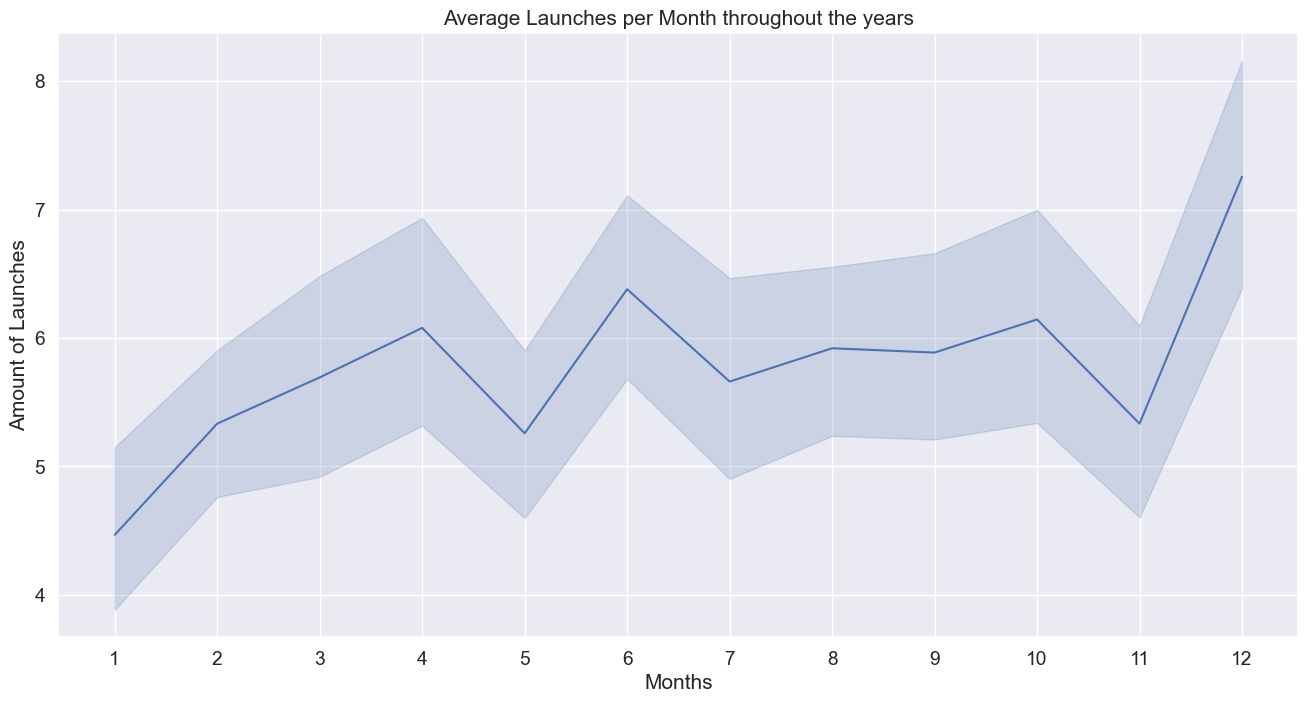

In [55]:
plt.figure(figsize=(16, 8), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.lineplot(
        data=df_year_month,
        x="Month",
        y="Organisation"
    )

    ax.set(xlabel="Months",
           ylabel="Amount of Launches",
           title="Average Launches per Month throughout the years")
    
    ax.set_xticks(np.arange(1, 13))

    for c in ax.containers:
        ax.bar_label(c, labels=[f"{x:,.0f}" for x in c.datavalues])
    
    plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [56]:
df_months = df_data.groupby("Month", as_index=False).count().sort_values("Month")
df_months

,Month,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,1,268,268,268,268,268,268,66,268,268,268
1,2,336,336,336,336,336,336,60,336,336,336
2,3,353,353,353,353,353,353,77,353,353,353
3,4,383,383,383,383,383,383,91,383,383,383
4,5,326,326,326,326,326,326,86,326,326,326
5,6,402,402,402,402,402,402,85,402,402,402
6,7,351,351,351,351,351,351,77,351,351,351
7,8,373,373,373,373,373,373,82,373,373,373
8,9,365,365,365,365,365,365,88,365,365,365
9,10,381,381,381,381,381,381,83,381,381,381


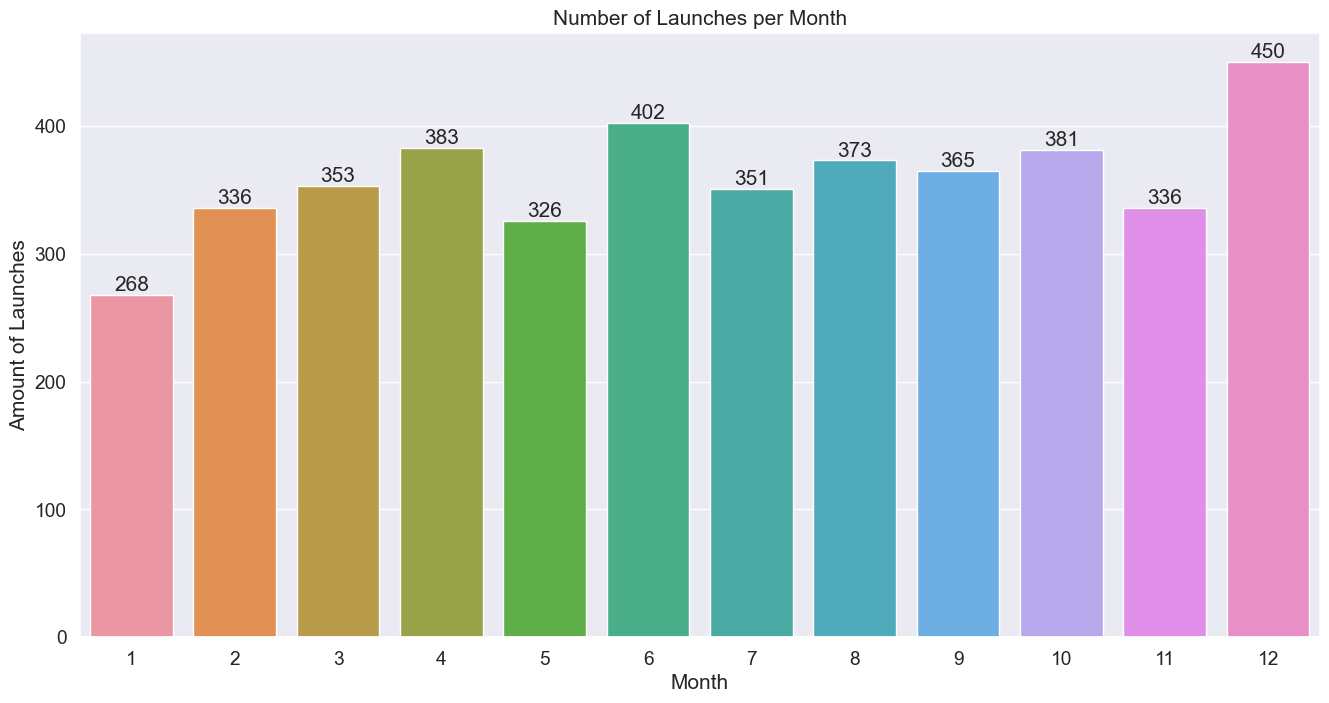

In [57]:
plt.figure(figsize=(16,8), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(
        data=df_months,
        x="Month",
        y="Organisation"
    )

    ax.set(xlabel="Month",
           ylabel="Amount of Launches",
           title="Number of Launches per Month")
    
    sns.color_palette("crest", as_cmap=True)
    
    for c in ax.containers:
        ax.bar_label(c, label=["f{x::,.0f}" for x in c.datavalues])

    plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [58]:
df_prices.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,30,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,65,Success


In [59]:
df_prices["Date"] = pd.to_datetime(df_prices["Date"])

C:\Users\ajdin\AppData\Local\Temp\ipykernel_3076\2615924895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df_prices.Date = pd.to_datetime(df_prices.Date, utc=True)
df_prices["Year"]= pd.DatetimeIndex(df_prices['Date']).year
df_prices.head()

c:\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajdin\AppData\Local\Temp\ipykernel_3076\1081036908.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,30,Success,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145,Success,2020
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,65,Success,2020


In [61]:
df_avg_prices = df_prices.groupby("Year", as_index=False)["Price"].mean().sort_values("Year")
df_avg_prices.head()

,Year,Price
0,1964,63
1,1965,63
2,1966,59
3,1967,197
4,1968,279


In [62]:
df_avg_prices.loc[(df_avg_prices["Year"] > 1985) & (df_avg_prices["Year"] <= 2000)].sort_values("Price", ascending=False)

,Year,Price
16,1987,"1,687"
17,1988,"1,193"
20,1991,391
18,1989,381
24,1995,325
21,1992,319
15,1986,310
19,1990,289
22,1993,277
25,1996,243


In [63]:
df_prices.groupby("Year", as_index=False)["Price"].count().sort_values("Year")
df_avg_prices.head()

,Year,Price
0,1964,63
1,1965,63
2,1966,59
3,1967,197
4,1968,279


In [64]:
df_count_prices = df_prices.groupby("Year", as_index=False).count().sort_values("Price", ascending=False)
df_count_prices.loc[(df_avg_prices["Year"] > 1985) & (df_avg_prices["Year"] <= 2000)].sort_values("Price", ascending=False)

,Year,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
26,1997,18,18,18,18,18,18,18,18
27,1998,18,18,18,18,18,18,18,18
29,2000,16,16,16,16,16,16,16,16
23,1994,16,16,16,16,16,16,16,16
28,1999,14,14,14,14,14,14,14,14
25,1996,14,14,14,14,14,14,14,14
22,1993,12,12,12,12,12,12,12,12
21,1992,12,12,12,12,12,12,12,12
19,1990,11,11,11,11,11,11,11,11
24,1995,10,10,10,10,10,10,10,10


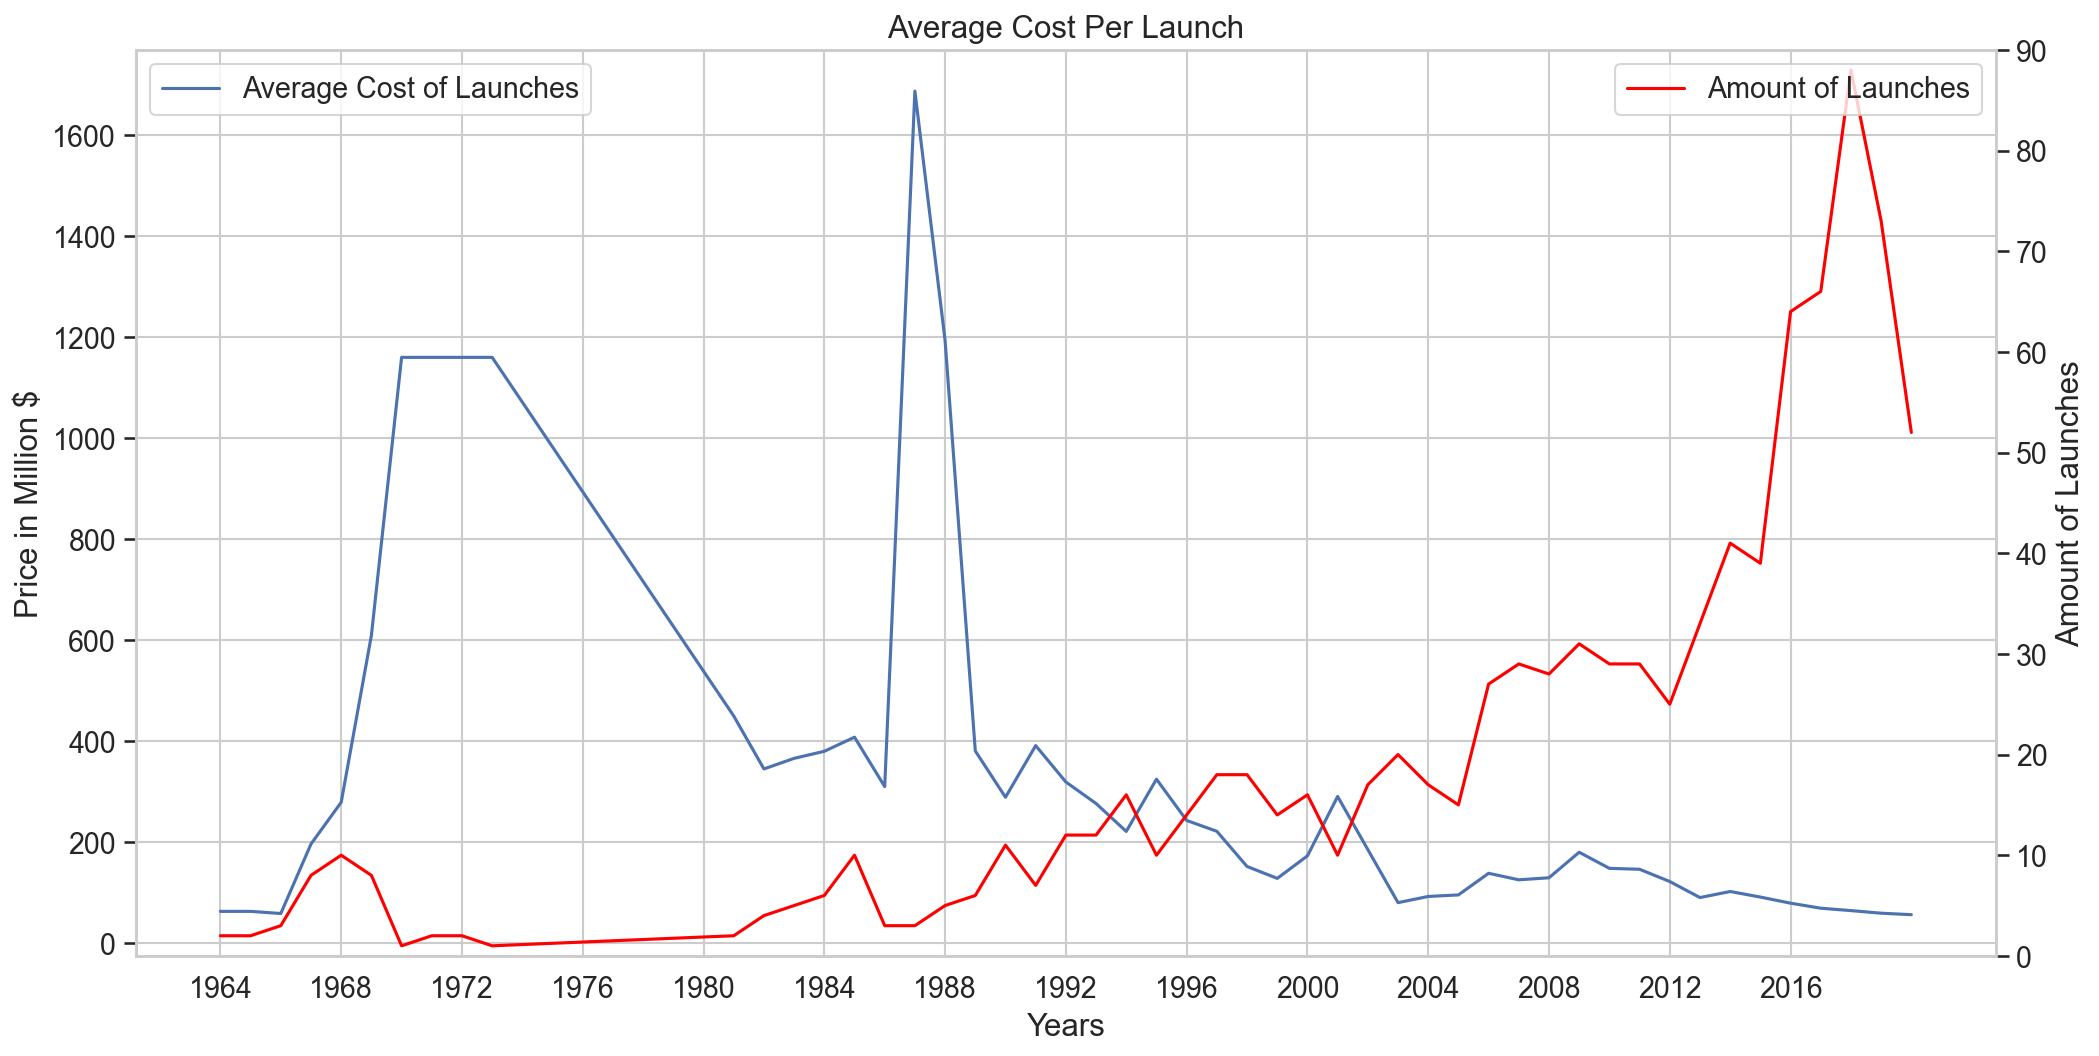

In [65]:
plt.figure(figsize=(16, 8), dpi=150)

with sns.axes_style("whitegrid"):

    ax1 = sns.lineplot(
        data=df_avg_prices,
        x="Year",
        y="Price"
    )

    ax1.set(xlabel="Years",
           ylabel="Price in Million $",
           title="Average Cost Per Launch")
    
    ax1.set_xticks(np.arange(df_avg_prices["Year"].min(), df_avg_prices["Year"].max(), 4))
    ax1.legend(["Average Cost of Launches"], loc="upper left")

    ax2 = ax1.twinx()

    sns.lineplot(
        data=df_count_prices,
        x="Year",
        y="Price",
        ax=ax2,
        color="red"
    )

    ax2.grid(visible=False) # turn off grid #2
    ax2.set_ylabel('Amount of Launches')
    ax2.set_ylim(0, 90)
    ax2.legend(["Amount of Launches"], loc="upper right")


    plt.show()



# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [66]:
df_top_10 = df_prices.groupby("Organisation", as_index=False).mean().sort_values("Price", ascending=False)[:10]
df_top_10

,Organisation,Unnamed: 0.1,Price,Year
16,RVSN USSR,"1,958","5,000","1,988"
14,NASA,"1,677",512,"1,993"
1,Boeing,981,177,"2,004"
0,Arianespace,557,170,"2,013"
21,ULA,538,151,"2,014"
7,ILS,737,102,"2,009"
12,MHI,528,95,"2,013"
13,Martin Marietta,"1,765",80,"1,991"
22,US Air Force,"3,742",60,"1,967"
9,JAXA,153,56,"2,019"


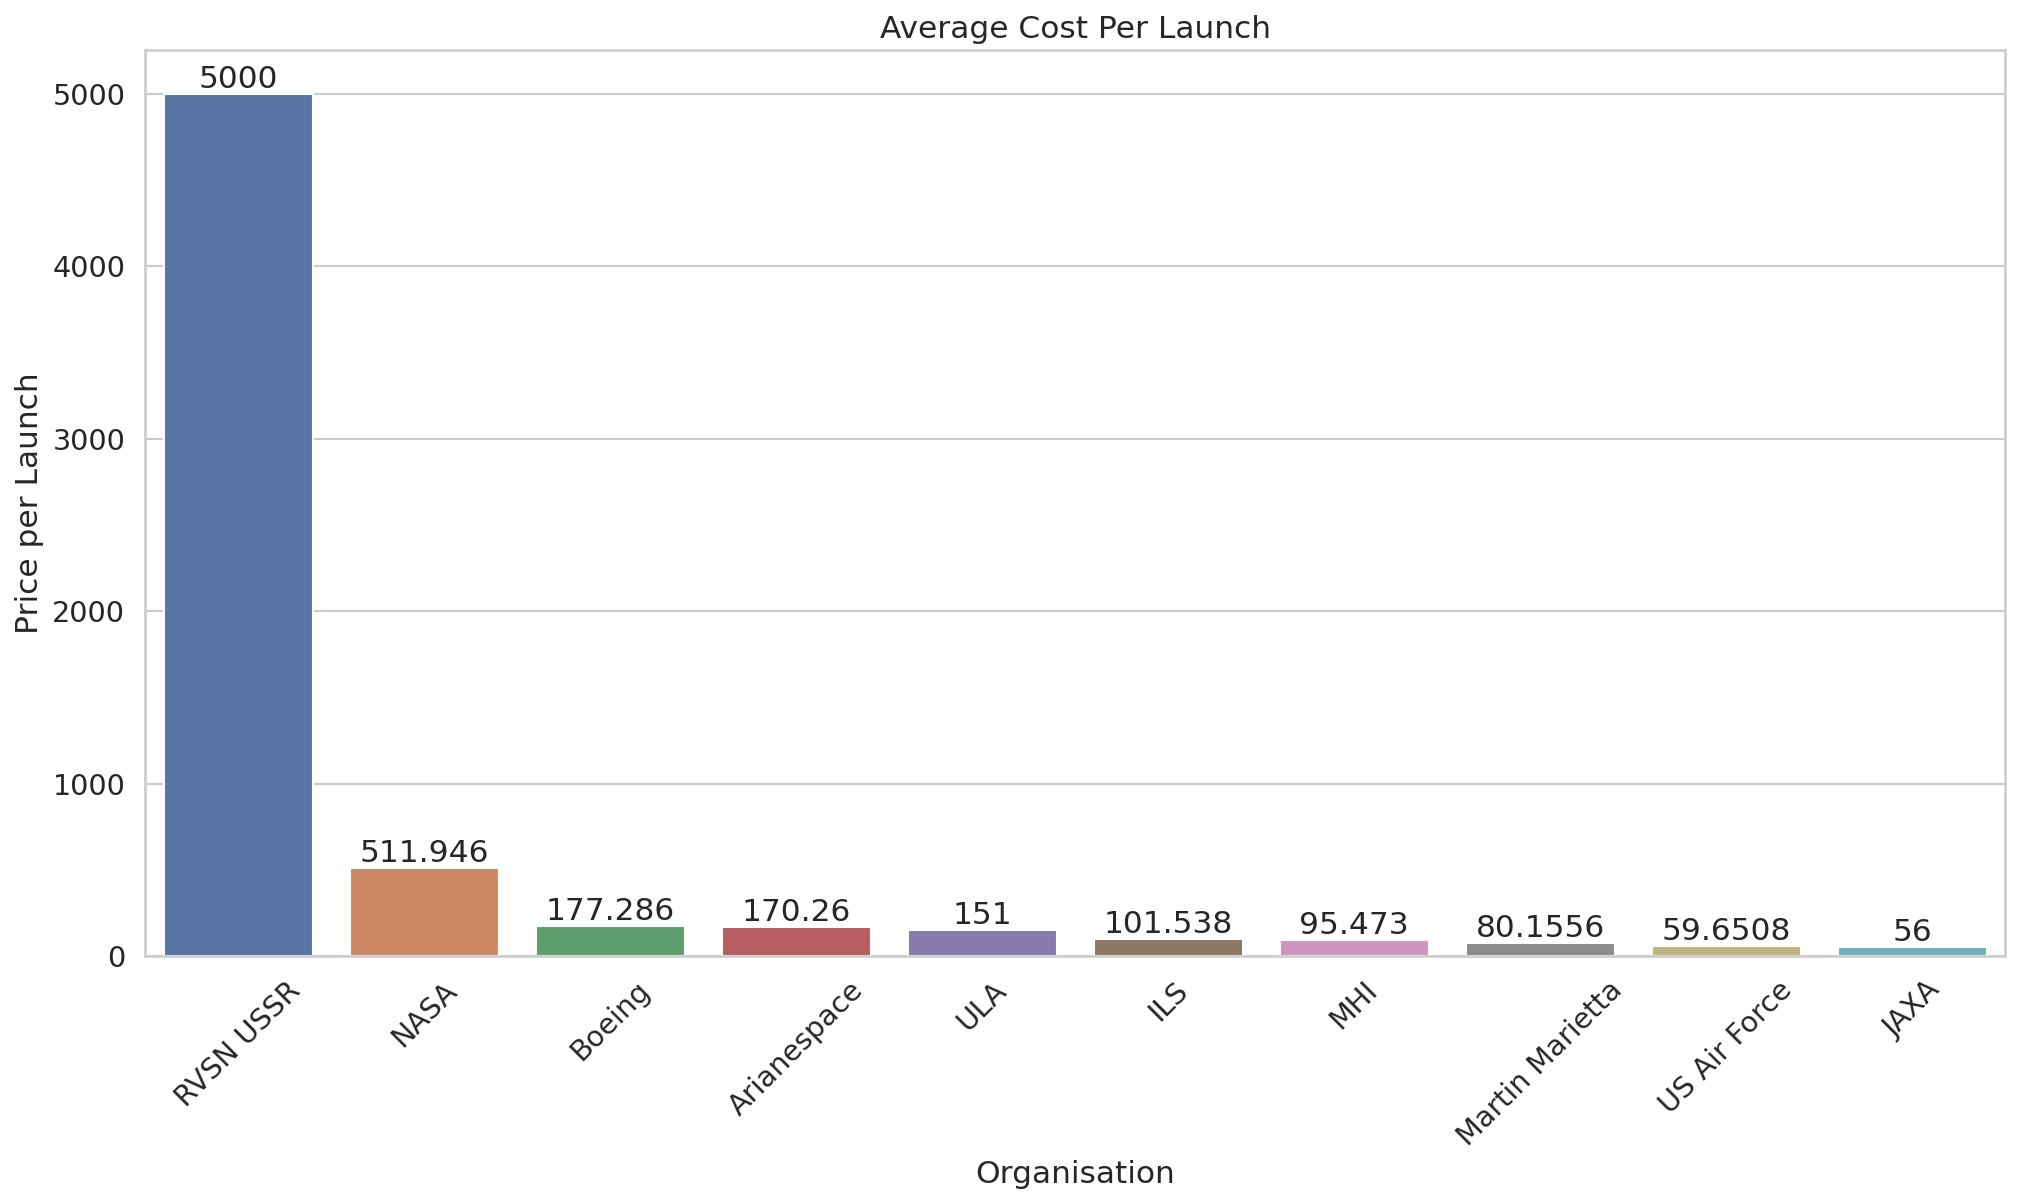

In [67]:
plt.figure(figsize=(16, 8), dpi=150)

with sns.axes_style("whitegrid"):

    ax = sns.barplot(
        data=df_top_10,
        x="Organisation",
        y="Price"
    )

    ax.set(xlabel="Organisation",
           ylabel="Price per Launch",
           title="Average Cost Per Launch")

    for c in ax.containers:
        ax.bar_label(c, label=["f{x:,.0}" for x in c.datavalues])

    plt.xticks(rotation=45)    



# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [68]:
df_cold_war = df_data.loc[df_data["Year"]<=1991]
df_cold_war["Country"].unique()

array([' China', ' Kazakhstan', ' Russia', ' France', ' USA', ' Japan',
       ' Israel', ' India', ' Kenya', ' Australia'], dtype=object)

In [69]:
df_cold_war["Country"] = df_cold_war["Country"].replace(to_replace=[" Russia", " Kazakhstan"], value="USSR")

C:\Users\ajdin\AppData\Local\Temp\ipykernel_3076\2194358142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
df_cold_war = df_cold_war.loc[(df_cold_war["Country"]==" USA") | (df_cold_war["Country"]=="USSR")]

In [71]:
df_cold_war.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,USSR,1991,12
1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,1991,12
1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991,12
1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,1991,11
1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,USSR,1991,11


In [72]:
df_cold_war_countries = df_cold_war.groupby("Country").count()
df_cold_war_countries

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
Country,,,,,,,,,,
USA,662,662,662,662,662,662,90,662,662,662
USSR,1770,1770,1770,1770,1770,1770,2,1770,1770,1770


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [73]:
plt.figure(figsize=(16, 8), dpi=200)

fig = px.pie(
    df_cold_war_countries,
    values="Organisation",
    names=df_cold_war_countries.index,
    title="Distribution of Launches between USA and USSR during Cold War",
    color_discrete_sequence=["red", "blue"]
)

fig.show()

<Figure size 3200x1600 with 0 Axes>

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [74]:
df_cold_war_year = df_cold_war.groupby(["Year", "Country"], as_index=False).count()
df_cold_war_year

,Year,Country,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month
0,1957,USA,1,1,1,1,1,1,0,1,1
1,1957,USSR,2,2,2,2,2,2,0,2,2
2,1958,USA,23,23,23,23,23,23,0,23,23
3,1958,USSR,5,5,5,5,5,5,0,5,5
4,1959,USA,16,16,16,16,16,16,0,16,16
...,...,...,...,...,...,...,...,...,...,...,...
65,1989,USSR,26,26,26,26,26,26,0,26,26
66,1990,USA,26,26,26,26,26,26,10,26,26
67,1990,USSR,37,37,37,37,37,37,0,37,37
68,1991,USA,18,18,18,18,18,18,7,18,18


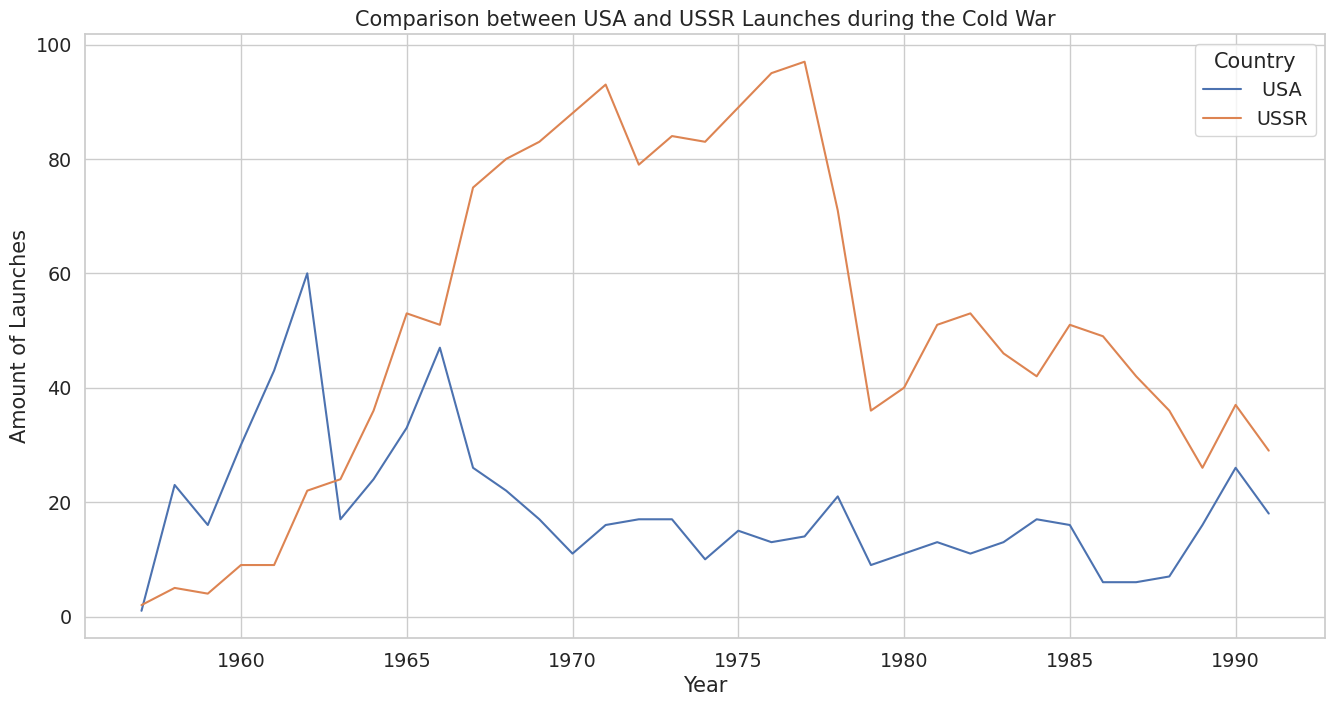

In [75]:
plt.figure(figsize=(16, 8), dpi=100)

with sns.axes_style("whitegrid"):
    ax1 = sns.lineplot(
        data=df_cold_war_year,
        x="Year",
        y="Organisation",
        hue="Country"
    )

    ax1.set(ylabel="Amount of Launches",
            title="Comparison between USA and USSR Launches during the Cold War")

## Chart the Total Number of Mission Failures Year on Year.

In [76]:
df_failures = df_failures.reset_index().head()

In [77]:
df_failures_year = df_data.groupby(["Year", "Mission_Status"], as_index=False).count()
df_failures_year = df_failures_year[df_failures_year["Mission_Status"]=="Failure"]

In [78]:
df_failures_year.head()

,Year,Mission_Status,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Country,Month
0,1957,Failure,1,1,1,1,1,1,0,1,1
2,1958,Failure,20,20,20,20,20,20,0,20,20
5,1959,Failure,9,9,9,9,9,9,0,9,9
8,1960,Failure,20,20,20,20,20,20,0,20,20
10,1961,Failure,17,17,17,17,17,17,0,17,17


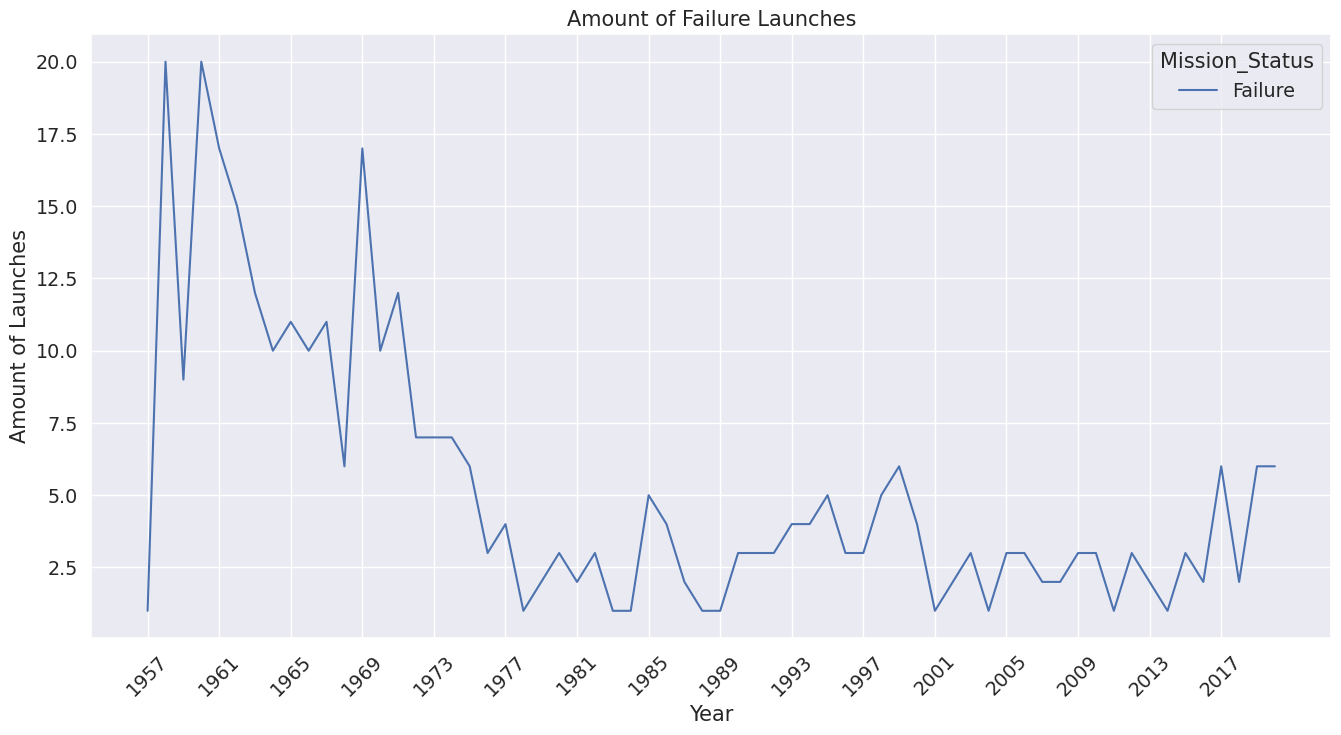

In [79]:
plt.figure(figsize=(16, 8), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.lineplot(
        data=df_failures_year,
        x="Year",
        y="Organisation",
        hue="Mission_Status"
    )

    ax.set(ylabel="Amount of Launches",
           title="Amount of Failure Launches")

    ax.set_xticks(np.arange(df_failures_year["Year"].min(), df_failures_year["Year"].max(), 4))
    
    plt.xticks(rotation=45)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [80]:
df_mission_status = df_data.groupby(["Year", "Mission_Status"], as_index=False).count()
df_mission_status["Mission_Status"].unique()

array(['Failure', 'Success', 'Partial Failure', 'Prelaunch Failure'],
      dtype=object)

In [81]:
df_failures_status = df_mission_status[df_mission_status["Mission_Status"].isin(["Failure", "Partial Failure", "Prelaunch Failure"])]

In [82]:
df_failures_status["Mission_Status"] = "Failure" 
df_failures_status["Mission_Status"].unique()

C:\Users\ajdin\AppData\Local\Temp\ipykernel_3076\1551685325.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Failure'], dtype=object)

In [83]:
df_failures_status = df_failures_status.groupby(["Year", "Mission_Status"], as_index=False).sum() 


In [84]:
df_yearly["Percentage"] = (df_failures_status["Organisation"] / df_yearly["Organisation"]) *100

In [85]:
df_yearly["Percentage"] = pd.to_numeric(df_yearly["Percentage"])
df_yearly.dtypes

Year                int64
Unnamed: 0.1        int64
Organisation        int64
Location            int64
Date                int64
Detail              int64
Rocket_Status       int64
Price               int64
Mission_Status      int64
Country             int64
Percentage        float64
dtype: object

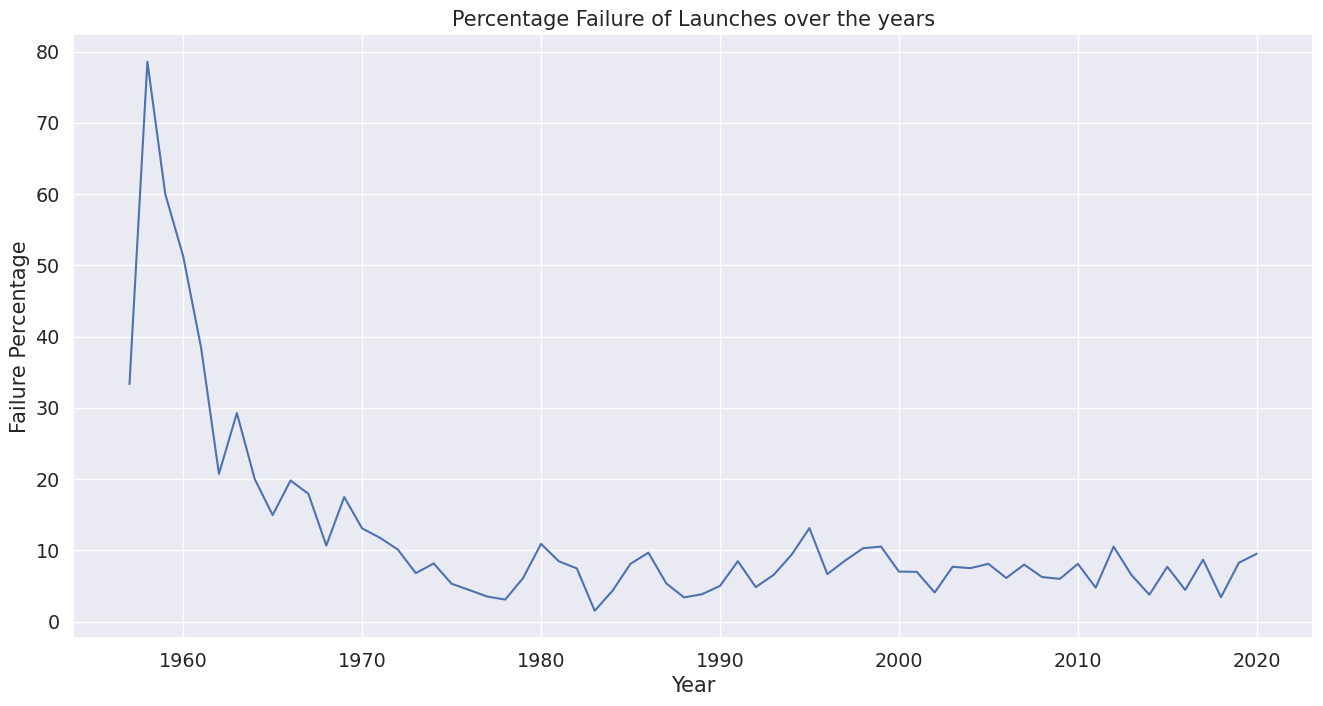

In [86]:
plt.figure(figsize=(16, 8), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.lineplot(
        data=df_yearly,
        x="Year",
        y="Percentage"
    )

    ax.set(ylabel="Failure Percentage",
           title="Percentage Failure of Launches over the years")

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [109]:
df_countries = df_data.groupby(["Year", "Country"], as_index=True).count()

In [111]:
df_countries.head()

Unnamed: 0.1  Organisation  Location  Date  Detail  \
Year Country                                                           
1957  Kazakhstan             2             2         2     2       2   
      USA                    1             1         1     1       1   
1958  Kazakhstan             5             5         5     5       5   
      USA                   23            23        23    23      23   
1959  Kazakhstan             4             4         4     4       4   

                  Rocket_Status  Price  Mission_Status  Month  
Year Country                                                   
1957  Kazakhstan              2      0               2      2  
      USA                     1      0               1      1  
1958  Kazakhstan              5      0               5      5  
      USA                    23      0              23     23  
1959  Kazakhstan              4      0               4      4

In [91]:
df_countries = df_data.groupby(["Year", "Country"], as_index=True).count()
df_countries.max(axis=1)

Year  Country                   
1957   Kazakhstan                    2
       USA                           1
1958   Kazakhstan                    5
       USA                          23
1959   Kazakhstan                    4
                                    ..
2020   Kazakhstan                    6
       New Zealand                   3
       Russia                        3
       Shahrud Missile Test Site     1
       USA                          21
Length: 436, dtype: int64

In [ ]:
plt.figure(figsize=(18, 6), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.barplot(
        data=df_countries,
        x="Year",
        y=df_countries.iloc[:, 2],
        hue="Country"
    )

AttributeError: 'bool' object has no attribute 'all'

<Figure size 1800x600 with 0 Axes>

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
df_org = df_data.groupby(["Year", "Organisation"], as_index=False).count()
df_org.head()

,Year,Organisation,Unnamed: 0.1,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Month
0,1957,RVSN USSR,2,2,2,2,2,0,2,2,2
1,1957,US Navy,1,1,1,1,1,0,1,1,1
2,1958,AMBA,7,7,7,7,7,0,7,7,7
3,1958,NASA,2,2,2,2,2,0,2,2,2
4,1958,RVSN USSR,5,5,5,5,5,0,5,5,5
